# Data Reduction

This notebook wil document two distinct types of data reduction, namely, numerosity data reduction and dimensionality data reduction. The first is concerned with reducing the number of rows in a data set, while the second reduces the number of attributes or columns in data.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Numerosity Reduction Methods

This notebook includes the following numerosity reduction methods:\

Random Sampling: This involves the random selection of some of the data objects to avoid unaffordable computational costs\

Stratified Sampling: This type of sampling randomly selects some of the data objects to avoid the unaffordable computational costs, all the while maintaining the ratio representation of the sub-populations in the sample\

Random Over/Under Sampling: This samping type selects some of the data objects to avoid unaffordable computational costs, while creating a prescribed representation of the sub-populations in the sample

## Dimensionality Data Reduction Methods

The following dimension reduction methods will be covered:\

Linear Regression\
Decision Tree\
Random Forest\
Brute Force Computational Dimension Reduction\
Principal Component Analysis\
Functional Data Analysis (FDA)

## Numerosity Reduction Methods

### Random sampling

To illustrate the example of random sampling, we will use a decision tree on some customer churn data to predict customer churn. This decision tree is tuned using a gridsearchCV function, which finds the optimal parameters for the model

In [4]:
customer_df = pd.read_csv('C:/Python_Data_Sets/Customer_Churn.csv')
customer_df

,Call Failure,Complains,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Churn
0,8,0,38,4370,71,5,17,1,0
1,0,0,39,318,5,7,4,0,0
2,10,0,37,2453,60,359,24,1,0
3,10,0,38,4198,66,1,35,1,0
4,3,0,38,2393,58,2,33,1,0
...,...,...,...,...,...,...,...,...,...
3145,21,0,19,6697,147,92,44,1,0
3146,17,0,17,9237,177,80,42,1,0
3147,13,0,18,3157,51,38,21,1,0
3148,7,0,11,4695,46,222,12,1,0


In [ ]:
The below code completes the gridsearchCV

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

y = customer_df['Churn']
Xs = customer_df.drop(columns = ['Churn'])

param_grid = {
      'criterion':['gini','entropy'],
      'max_depth': [10, 20, 30, 40, 50, 60],
      'min_samples_split': [10, 20, 30, 40, 50],
      'min_impurity_decrease': [0, 0.001,
                    0.005, 0.01, 0.05, 0.1]}

gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                          param_grid, cv = 3, 
                          scoring = 'recall', verbose = 1)
gridSearch.fit(Xs, y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best score:  0.7353535353535353
Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 40}


We can shorten the computational time to run the above gridSearchCV through random sampling, which can be completed with the below code. A random sample of 1000 rows has been selected. 

In [7]:
customer_df_rs = customer_df.sample(1000, random_state = 1)
y = customer_df_rs['Churn']
Xs = customer_df_rs.drop(columns = ['Churn'])

gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                          param_grid, cv = 3, 
                          scoring = 'recall',verbose = 1)
gridSearch.fit(Xs, y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Initial score:  0.7430555555555555
Initial parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 10}


Now that we have the decision tree classifier, we can visualise the tree. We need graphviz for this and it needs installing first

In [26]:
conda install graphviz

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
The below code enables us to visualise the decision tree.

In [28]:
y = customer_df['Churn']
Xs = customer_df.drop(columns = ['Churn'])

classTree = DecisionTreeClassifier(criterion = 'entropy', 
                                   max_depth = 10,
                                   min_samples_split = 10,
                                   min_impurity_decrease = 0.005)
classTree.fit(Xs, y)

dot_data = export_graphviz(classTree, 
                           out_file = None, 
                           feature_names = Xs.columns,  
                           class_names = ['Not Churn',
                                        'Churn'], 
                           filled = True,
                           rounded = True, 
                           special_characters = True)  
graph = graphviz.Source(dot_data) 
graph.render(filename = 'ChurnDT')

'ChurnDT.pdf'

A problem with random sampling is that it doesn't match the composition of the dependent variable class, as in the distribution of the value label counts. The actual data composition is indicated below

In [31]:
customer_df.Churn.value_counts(normalize = True)

0    0.842857
1    0.157143
Name: Churn, dtype: float64

We can compare this distribution with the outputs of three random sampling distributions, as below, which do not match the original data set

In [32]:
for i in range(3):
    print(customer_df.sample(1000).Churn.value_counts(normalize = True))

0    0.854
1    0.146
Name: Churn, dtype: float64
0    0.841
1    0.159
Name: Churn, dtype: float64
0    0.821
1    0.179
Name: Churn, dtype: float64


## Stratified Sampling

This type of sampling overcomes the problems associated with random sampling, as just identified. This type of samplimg ensures the sample matches the same representation of groups in the original data.

In [33]:
n, s = len(customer_df), 1000
r = s/n
sample_df = customer_df.groupby('Churn', group_keys = False).apply(lambda sdf: sdf.sample(round(len(sdf) * r)))
print(sample_df.Churn.value_counts(normalize = True))

0    0.843
1    0.157
Name: Churn, dtype: float64


## Random Over/Under Sampling

This sampling technique means that the user selects their chosen ratio of data composition. It is typically used when the dependent variable has a binary structure of two classes and one class is generally significant more in count than the other. This type of sampling always ensures that the two classes are equal.

In [34]:
n, s = len(customer_df), 500
sample_df = customer_df.groupby('Churn', group_keys = False).apply(lambda sdf: sdf.sample(250))
print(sample_df.Churn.value_counts(normalize = True))

0    0.5
1    0.5
Name: Churn, dtype: float64


# Dimensionality Data Reduction

This section is concerned with reducing the column number and features the following methods:\

Linear Regression\
Decision Tree\
Random Forest\
Brute Force Computational Dimension Reduction\
Principal Component Analysis\
Functional Data Analysis (FDA)

## Dimension Reduction using Linear Regression

In [36]:
amzn_df = pd.read_csv('C:/Python_Data_Sets/amznStock.csv')
amzn_df.set_index('t', drop = True, inplace = True)
amzn_df.columns = ['pd_changeP', 'pw_changeP', 'dow_pd_changeP',
       'dow_pw_changeP', 'nasdaq_pd_changeP', 'nasdaq_pw_changeP',
       'changeP']
amzn_df

,pd_changeP,pw_changeP,dow_pd_changeP,dow_pw_changeP,nasdaq_pd_changeP,nasdaq_pw_changeP,changeP
t,,,,,,,
23/08/2019,-1.035349,-1.078743,0.188949,-0.105289,-0.333497,-0.268107,-3.049884
26/08/2019,-3.049884,-0.756680,-2.374425,0.586671,-3.145535,-0.335637,1.100239
27/08/2019,1.100239,-0.408193,1.053224,1.248816,1.473944,1.204158,-0.397996
28/08/2019,-0.397996,-1.714856,-0.466931,-0.417636,-0.118683,-0.500783,0.137360
29/08/2019,0.137360,-2.856089,1.001630,-0.381429,0.289057,-1.702481,1.255492
...,...,...,...,...,...,...,...
06/01/2021,1.000434,1.043553,0.554889,0.868805,0.848544,1.179472,-2.489665
07/01/2021,-2.489665,-1.081419,1.440532,2.084550,-1.398414,-0.689640,0.757717
08/01/2021,0.757717,-3.708938,0.686781,2.095648,2.505046,0.784415,0.649557


The above data set has the following variables\: 

pd_changeP: Amazon's stock price change in the previous day\
pw_changeP: Amazon's stock price change in the previous week\
dow_pd_changeP: Dow Jones change the previous day\
dow_pw_changeP: Dow Jones change the previous week\
nasdaq_pd_changeP: NASDQ 100 change in the previous day\
nasdaq_pw_changeP: NASDQ 100 change in the previous week\
change_P: change today

It is neccesaary to use the OLS() function from the statsmodels.api, rather than the LinearRegression() as this former function enables hypothesis testing required for dimension reduction. In the below code, the instruction Xs = sm.add_constant(Xs), adds a column whose value for all the rows is 1. This ensures that the OLS() will include a constant coefficient. 

In [39]:
import statsmodels.api as sm

Xs = amzn_df.drop(columns = ['changeP'],
                  index = ['12/01/2021'] )
Xs = sm.add_constant(Xs)

y = amzn_df.drop(index = ['12/01/2021']).changeP

sm.OLS(y, Xs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                changeP   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3.678
Date:                Tue, 15 Feb 2022   Prob (F-statistic):            0.00149
Time:                        19:23:00   Log-Likelihood:                -750.72
No. Observations:                 349   AIC:                             1515.
Df Residuals:                     342   BIC:                             1542.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2342      0.122      1.926      0.055      -0.005       0.473
pd_changeP           -0.0804      0.112     -0.719      0.473      -0.300       0.140
pw_changeP            0.0665      0.044      1.499      0.135      -0.021       0.154
dow_pd_changeP       -0.2888      0.151     -1.914      0.056      -0.586       0.008
dow_pw_changeP        0.0866      0.066      1.316      0.189      -0.043       0.216
nasdaq_pd_changeP     0.0919      0.210      0.438      0.661      -0.321       0.505
nasdaq_pw_changeP    -0.1403      0.098     -1.433      0.153      -0.333       0.052
==============================================================================
Omnibus:                       25.863   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.802
Skew:                          -0.036   Prob(JB):                     5.79e-22
Kurtosis:                       5.592   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above output indicates that only the dow_pd_changeP variable is worth keeping and even then that is debatable. 

A significant problem with linear regression is that it assumes a univariate approach in deciding if an independent variable helps predict the dependent variable. Often, it is the reality that the the independent variable is not a good predictor of the dependent variable, but its interaction with the other independent variables may be helpful. Therefore, before we have captured multi-variate pattern recognition, linear regression is not a good choice. Decision tree, random forest or computational dimension reduction should be used instead.

## Decision Tree as a dimension reduction method

Decision trees can be used for this purpose because logically, if a variable remained part of a final tree, then it must be important to the dependent variable. Yet, this method has several weaknesses. The tree makes a binary decision whether each variable should be included or not and it is not possible to see how valuable each dependent variable is. Secondly, a variable may be excluded soley because the logic and structure of the decision tree fails to capture the specific patterns that the variable plays a role in. The variable itself may be useful to retain. So, perhaps better methods should be used.

## Random Forest as a Dimension Reduction method

In [40]:
from sklearn.ensemble import RandomForestClassifier

y = customer_df['Churn']
Xs = customer_df.drop(columns = ['Churn'])

rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(Xs, y)

RandomForestClassifier(n_estimators=1000)

The below code generates the numerical values for the importance of each variable, while the bar chart that follows, visualises this

In [41]:
rf.feature_importances_

array([0.0723194 , 0.1983813 , 0.12862209, 0.16124581, 0.13162293,
       0.0769829 , 0.09402911, 0.13679646])

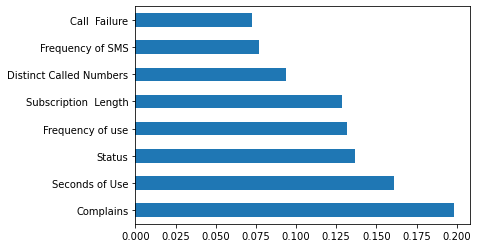

In [42]:
importance_sr = pd.Series(rf.feature_importances_,index = Xs.columns)
importance_sr.sort_values(ascending = False).plot.barh()
plt.show()

A concern with random forest is that we cannot be certain that if an attribute does not show enough importance through the random forest, it will not be valuable for predicting the dependent variable in other algorithyms. The next method called brute force computational dimension reduction does not suffer from this problem however.

## Brute-force Computational Dimension Reduction

The approach here is that all the different subsets of independent variables are used in an algorithym to predict or classify the dependent variable. This means of course, that it is very computationally intensive. It does not suffer from the weaknesses identified that weaken the afore mentioned methods of dimension reduction. It can also be coupled to other methods, so it becomes perhaps a framework. The below code runs KNN through this brute force framework.

The below code contains some important elements.\
Itertools enables a series of nested loops, which helps in this case to create every possible combination of independent variables, so that we can identify the optimal combination.\
Result_df object creates a placeholder in which all the records of the brute force outputs are stored.\
We are interested in recall as a performance metric as it indicates the proportion of actual positives that are identified correctly\
We use four values [1, 3, 5, 7] for use in the KNN method, as otherwisem it would become to computationally intensive to run

In [99]:
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

in_atts = ['Call  Failure', 'Complains', 'Subscription  Length',
           'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 
           'Distinct Called Numbers', 'Status']
n_in_atts = len(in_atts)
result_df = pd.DataFrame(columns = ['subset_candidate','best_k',
                                    'performance'])
customer_df_std = (customer_df - customer_df.min()) / (
    customer_df.max() - customer_df.min())

# The output is very large, so I didn't run it

# for n in range(1,n_in_atts + 1):
    for atts in itertools.combinations(in_atts, r = n):
        atts = list(atts)
        Xs = customer_df_std[atts]
        y = customer_df['Churn']
        
        # Tune KNN
        param_grid = {
            'n_neighbors':[1, 3, 5, 7]}
        gridSearch = GridSearchCV(KNeighborsClassifier(), 
                          param_grid, cv = 2, scoring = 'recall')
        gridSearch.fit(Xs, y)
        best_k = gridSearch.best_params_['n_neighbors']
        
        # Train the tuned KNN
        knn = KNeighborsClassifier(best_k)
        knn.fit(Xs, y)
        
        # Prediction
        y_predict = knn.predict(Xs)
        
        # Performance evaluation
        dic_append = {'subset_candidate':atts, 'best_k': best_k,
                      'performance': recall_score(y, y_predict)}
        
        # Recording and Reporting
        result_df = result_df.append(dic_append, ignore_index = True)
        print(dic_append)

IndentationError: unexpected indent (Temp/ipykernel_30164/664632094.py, line 16)

In [44]:
result_df.sort_values('performance', ascending = False)

,subset_candidate,best_k,performance
62,"[Complains, Seconds of Use, Frequency of use]",1,1.000000
173,"[Call Failure, Complains, Seconds of Use, Fre...",1,0.997980
137,"[Complains, Seconds of Use, Frequency of use, ...",1,0.997980
138,"[Complains, Seconds of Use, Frequency of use, ...",1,0.997980
99,"[Call Failure, Complains, Seconds of Use, Dis...",1,0.997980
...,...,...,...
14,"[Call Failure, Status]",3,0.282828
2,[Subscription Length],3,0.218182
6,[Distinct Called Numbers],1,0.193939
7,[Status],1,0.000000


The performance scores in the above table are recall scores.

The two numerosity methods and four dimensionality reduction methods we have so far examined have been specifically concerned with classification and prediction. The following section explores more general methods, specifically principal component analysis (PCA) and functional data analysis (FDA)

# Principal Component Analysis (PCA)

This is the most famous and general non parametric dimension reduction method and we are going to examine it using the toy data set

In [47]:
toy_df = pd.read_csv('C:/Python_Data_Sets/PCA_toy_dataset.csv')
toy_df

,Dimension_1,Dimension_2
0,41,52
1,50,64
2,64,52
3,37,51
4,91,99
5,66,78
6,43,19
7,84,103
8,64,49
9,88,94


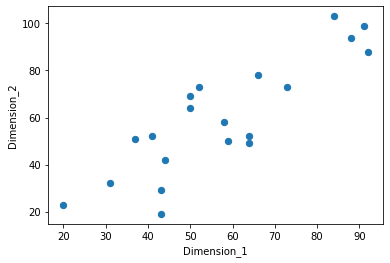

In [48]:
toy_df.plot.scatter(x = 'Dimension_1', y = 'Dimension_2', s = 40)
plt.show()

In the below code blocks, we can see that dimension 1 and dimension 2 are strongly correlated and that there is a total of 1026.989474 variations in the data, of which dimension 1 contributes 415.315789

In [49]:
var_df = pd.DataFrame(toy_df.var())
var_df.columns = ['Variance']
var_df.reset_index(inplace = True)
var_df

,index,Variance
0,Dimension_1,415.315789
1,Dimension_2,611.673684


In [50]:
var_df = var_df.append({'index': 'Total', 'Variance': var_df.Variance.sum()}, ignore_index = True)
var_df.set_index('index')

,Variance
index,
Dimension_1,415.315789
Dimension_2,611.673684
Total,1026.989474


In [51]:
toy_df.corr()

,Dimension_1,Dimension_2
Dimension_1,1.000000,0.859195
Dimension_2,0.859195,1.000000


## The PCA Method

If a data set variables form non linear relationships whose inclusion is important for analytic goals, PCA should be avoided. 

In [55]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(toy_df)

toy_T_df = pd.DataFrame(pca.transform(toy_df))
toy_T_df.columns = ['PC1', 'PC2']
toy_T_df

,PC1,PC2
0,16.469846,-7.962674
1,1.476788,-8.418973
2,2.116506,10.009016
3,19.747457,-10.464127
4,-51.457824,1.775480
5,-19.447434,-4.653743
6,41.007198,14.194004
7,-50.214928,-6.190398
8,4.460640,11.881191
9,-45.678760,2.551638


If we compare the immediate table above with the original columns, it may appear there is not much commonality the PCA transformed data holds with the original. However, if we run the next few blocks of code, we can begin to see some similarities. For instance, the total variance remains the same and the two dimensions are not correlated with each other

In [56]:
var_T_df = pd.DataFrame(toy_T_df.var())
var_T_df.columns = ['Variance']
var_T_df.reset_index(inplace = True)
var_T_df

,index,Variance
0,PC1,957.537176
1,PC2,69.452298


In [57]:
var_T_df = var_T_df.append({'index': 'Total', 'Variance': var_T_df.Variance.sum()}, ignore_index = True)
var_T_df.set_index('index')

,Variance
index,
PC1,957.537176
PC2,69.452298
Total,1026.989474


In [58]:
toy_T_df.corr()

,PC1,PC2
PC1,1.000000e+00,-1.663151e-17
PC2,-1.663151e-17,1.000000e+00


### Non-parametric Dimension Reduction

In [62]:
report_df = pd.read_csv('C:/Python_Data_Sets/WH Report_preprocessed.csv')
country_df = report_df.pivot(index = 'Name', columns = 'year',
                             values = ['Life_Ladder','Log_GDP_per_capita',
                                     'Social_support','Healthy_life_expectancy_at_birth',
                                     'Freedom_to_make_life_choices',
                                     'Generosity', 'Perceptions_of_corruption',
                                     'Positive_affect', 'Negative_affect'])

In [63]:
country_df

Life_Ladder                                                   \
year               2010   2011   2012   2013   2014   2015   2016   2017   
Name                                                                       
Afghanistan       4.758  3.832  3.783  3.572  3.131  3.983  4.220  2.662   
Albania           5.269  5.867  5.510  4.551  4.814  4.607  4.511  4.640   
Algeria           5.464  5.317  5.605  5.980  6.355  5.848  5.341  5.249   
Argentina         6.441  6.776  6.468  6.582  6.671  6.697  6.427  6.039   
Armenia           4.368  4.260  4.320  4.277  4.453  4.348  4.325  4.288   
...                 ...    ...    ...    ...    ...    ...    ...    ...   
Uruguay           6.062  6.554  6.450  6.444  6.561  6.628  6.171  6.336   
Uzbekistan        5.095  5.739  6.019  5.940  6.049  5.972  5.893  6.421   
Vietnam           5.296  5.767  5.535  5.023  5.085  5.076  5.062  5.175   
Zambia            4.999  4.999  5.013  5.244  4.346  4.843  4.348  3.933   
Zimbabwe          4.682  4.846  4.955  4.690  4.184  3.703  3.735  3.638   

                           ... Negative_affect                               \
year          2018   2019  ...            2010   2011   2012    2013   2014   
Name                       ...                                                
Afghanistan  2.694  2.375  ...           0.275  0.267  0.268  0.2730  0.375   
Albania      5.004  4.995  ...           0.300  0.257  0.271  0.3380  0.335   
Algeria      5.043  4.745  ...           0.255  0.255  0.230  0.2035  0.177   
Argentina    5.793  6.086  ...           0.211  0.232  0.272  0.2540  0.238   
Armenia      5.062  5.488  ...           0.426  0.459  0.464  0.4500  0.404   
...            ...    ...  ...             ...    ...    ...     ...    ...   
Uruguay      6.372  6.600  ...           0.231  0.252  0.214  0.2530  0.251   
Uzbekistan   6.205  6.154  ...           0.152  0.123  0.118  0.1300  0.106   
Vietnam      5.296  5.467  ...           0.216  0.193  0.221  0.1650  0.241   
Zambia       4.041  3.307  ...           0.204  0.204  0.250  0.3080  0.327   
Zimbabwe     3.616  2.694  ...           0.122  0.211  0.177  0.1820  0.239   

                                                
year          2015   2016   2017   2018   2019  
Name                                            
Afghanistan  0.339  0.348  0.371  0.405  0.502  
Albania      0.350  0.322  0.334  0.319  0.274  
Algeria      0.277  0.377  0.289  0.293  0.215  
Argentina    0.305  0.312  0.292  0.321  0.319  
Armenia      0.438  0.437  0.437  0.455  0.430  
...            ...    ...    ...    ...    ...  
Uruguay      0.300  0.283  0.280  0.275  0.222  
Uzbekistan   0.103  0.147  0.203  0.209  0.220  
Vietnam      0.232  0.223  0.207  0.191  0.186  
Zambia       0.382  0.372  0.387  0.351  0.394  
Zimbabwe     0.179  0.209  0.224  0.212  0.235  

[122 rows x 90 columns]

Before using PCA, it is neccessary to standardize the data, which means that all transformed variables have a standard deviation of one, which the below code block completes. This step is required as PCA looks for variation. If one or more variables have a large variance, then the PCA will focus on these and distort the PCA output. 

In [64]:
Xs = country_df
Xs = (Xs - Xs.mean()) / Xs.std()
Xs

Life_Ladder                                                    \
year               2010      2011      2012      2013      2014      2015   
Name                                                                        
Afghanistan   -0.622104 -1.511427 -1.475323 -1.543065 -1.998271 -1.323126   
Albania       -0.190849  0.282957  0.020949 -0.744787 -0.576171 -0.772155   
Algeria       -0.026280 -0.202012  0.103257  0.420421  0.725942  0.323607   
Argentina      0.798253  1.084478  0.850959  0.911293  0.992956  1.073246   
Armenia       -0.951242 -1.134033 -1.010066 -0.968207 -0.881208 -1.000843   
...                 ...       ...       ...       ...       ...       ...   
Uruguay        0.478398  0.888727  0.835364  0.798768  0.900008  1.012322   
Uzbekistan    -0.337695  0.170091  0.461946  0.387805  0.467379  0.433095   
Vietnam       -0.168062  0.194781  0.042609 -0.359918 -0.347181 -0.358043   
Zambia        -0.418714 -0.482412 -0.409652 -0.179714 -0.971621 -0.563774   
Zimbabwe      -0.686244 -0.617321 -0.459903 -0.631447 -1.108508 -1.570357   

                                                     ... Negative_affect  \
year             2016      2017      2018      2019  ...            2010   
Name                                                 ...                   
Afghanistan -1.128955 -2.567462 -2.660826 -2.784707  ...        0.435211   
Albania     -0.871862 -0.824119 -0.564109 -0.543304  ...        0.768225   
Algeria     -0.138575 -0.287367 -0.528710 -0.757178  ...        0.168800   
Argentina    0.820884  0.408913  0.152042  0.390044  ...       -0.417305   
Armenia     -1.036190 -1.134360 -0.511464 -0.121544  ...        2.446616   
...               ...       ...       ...       ...  ...             ...   
Uruguay      0.594713  0.670679  0.677583  0.829769  ...       -0.150894   
Uzbekistan   0.349106  0.745595  0.526002  0.448217  ...       -1.203218   
Vietnam     -0.385065 -0.352588 -0.299070 -0.139509  ...       -0.350702   
Zambia      -1.015870 -1.447245 -1.438195 -1.987383  ...       -0.510549   
Zimbabwe    -1.557442 -1.707248 -1.823955 -2.511803  ...       -1.602835   

                                                                         \
year             2011      2012      2013      2014      2015      2016   
Name                                                                      
Afghanistan  0.251784  0.151250  0.078632  1.392257  0.846426  0.766223   
Albania      0.123794  0.188845  0.867605  0.877238  0.990833  0.452838   
Algeria      0.098196 -0.324944 -0.764963 -1.157086  0.032497  1.115768   
Argentina   -0.196182  0.201376 -0.151991 -0.371682  0.400078  0.332305   
Armenia      2.709200  2.607412  2.227067  1.765645  2.146087  1.838965   
...               ...       ...       ...       ...       ...       ...   
Uruguay      0.059799 -0.525447 -0.164129 -0.204301  0.334438 -0.017240   
Uzbekistan  -1.591277 -1.728465 -1.657110 -2.071244 -2.251756 -1.656486   
Vietnam     -0.695344 -0.437727 -1.232278 -0.333056 -0.558258 -0.740437   
Zambia      -0.554555 -0.074316  0.503464  0.774234  1.410925  1.055502   
Zimbabwe    -0.464962 -0.989110 -1.025931 -0.358807 -1.254036 -0.909183   

                                           
year             2017      2018      2019  
Name                                       
Afghanistan  1.000075  1.302003  2.385332  
Albania      0.559866  0.318447 -0.165331  
Algeria      0.024478  0.021092 -0.825371  
Argentina    0.060170  0.341320  0.338089  
Armenia      1.785312  1.873838  1.579860  
...               ...       ...       ...  
Uruguay     -0.082600 -0.184768 -0.747061  
Uzbekistan  -0.998710 -0.939591 -0.769435  
Vietnam     -0.951120 -1.145451 -1.149798  
Zambia       1.190435  0.684421  1.177123  
Zimbabwe    -0.748862 -0.905281 -0.601629  

[122 rows x 90 columns]

Now we can run the PCA, as seen in the following code

In [65]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(Xs)

Xs_t = pd.DataFrame(pca.transform(Xs), index = Xs.index)
Xs_t.columns = ['PC{}'.format(i) for i in range(1,91)]

C:\Users\Nicholas\anaconda3\envs\Fatalities_Prediction\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nicholas\anaconda3\envs\Fatalities_Prediction\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [66]:
['PC{}'.format(i) for i in range(1,91)]

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60',
 'PC61',
 'PC62',
 'PC63',
 'PC64',
 'PC65',
 'PC66',
 'PC67',
 'PC68',
 'PC69',
 'PC70',
 'PC71',
 'PC72',
 'PC73',
 'PC74',
 'PC75',
 'PC76',
 'PC77',
 'PC78',
 'PC79',
 'PC80',
 'PC81',
 'PC82',
 'PC83',
 'PC84',
 'PC85',
 'PC86',
 'PC87',
 'PC88',
 'PC89',
 'PC90']

The next thing to determine is how much variation is allocated to each of the 90 principal components. Such information can be determined with the below code.The two columns indicate the variance percentage for each PC and the cumulative variance percentage up until each PC

In [67]:
total_variance = Xs_t.var().sum()
dic = {'variance_percentage':Xs_t.var() / total_variance,
       'cumulative_variance_percentage':
       Xs_t.var().cumsum() / total_variance}

explanation_df = pd.DataFrame(dic)
explanation_df

,variance_percentage,cumulative_variance_percentage
PC1,4.775917e-01,0.477592
PC2,1.609550e-01,0.638547
PC3,7.197769e-02,0.710524
PC4,6.833512e-02,0.778860
PC5,5.290713e-02,0.831767
...,...,...
PC86,4.023476e-08,1.000000
PC87,6.144899e-11,1.000000
PC88,1.160389e-31,1.000000
PC89,1.738421e-33,1.000000


The above figure indicates that the the first 3 PC's collectively contribute 71% of the total variation. The following figure indicates a 3d scatterplot of the first three PC's. The representation of colour only carries about 10% of the variation.

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

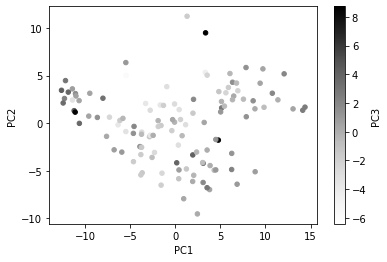

In [68]:
Xs_t.plot.scatter(x = 'PC1', y = 'PC2', c = 'PC3', sharex = False)

A perhaps easier to understand visualisation is presented by running the following code

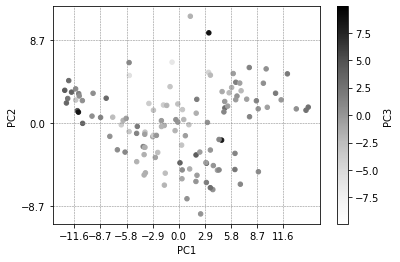

In [69]:
Xs_t.plot.scatter(x = 'PC1', y = 'PC2', c = 'PC3', sharex = False, 
                  vmin = -1/0.101, vmax = 1/0.101)

x_ticks_vs = [-2.9 * 4 + 2.9 * i for i in range(9)]
for v in x_ticks_vs:
    plt.axvline(v, c = 'gray', linestyle = '--', linewidth = 0.5)
plt.xticks(x_ticks_vs)

y_ticks_vs = [-8.7, 0, 8.7]
for v in y_ticks_vs:
    plt.axhline(v, c ='gray', linestyle = '--', linewidth = 0.5)
plt.yticks(y_ticks_vs)
plt.show()

If we also want to add countries to the plot, this can be done with the below

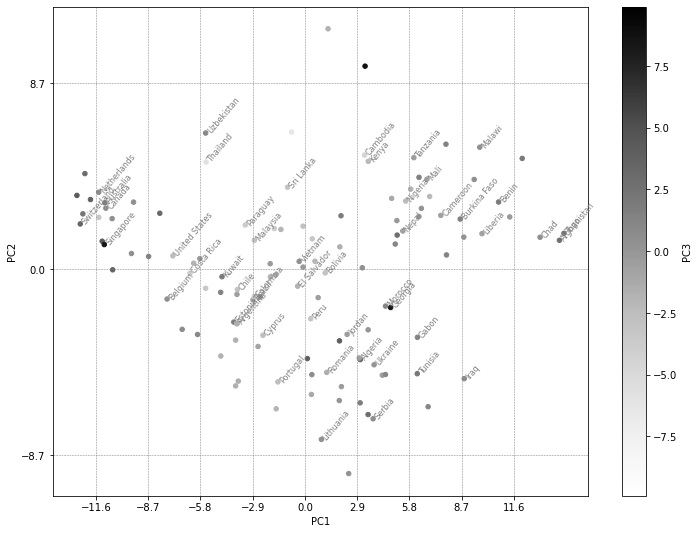

In [70]:
Xs_t.plot.scatter(x = 'PC1', y = 'PC2', c = 'PC3', sharex = False, 
                  vmin = -1 / 0.101, vmax = 1 / 0.101,
                  figsize = (12, 9))

x_ticks_vs = [-2.9 * 4 + 2.9 * i for i in range(9)]
for v in x_ticks_vs:
    plt.axvline(v, c = 'gray', linestyle = '--', linewidth = 0.5)
plt.xticks(x_ticks_vs)

y_ticks_vs = [-8.7, 0, 8.7]
for v in y_ticks_vs:
    plt.axhline(v, c = 'gray', linestyle = '--', linewidth = 0.5)
plt.yticks(y_ticks_vs)

for i, row in Xs_t.sample(50).iterrows():
    plt.annotate(i, (row.PC1, row.PC2),
                 rotation = 50, c = 'gray', size = 8)
plt.show()

## Functional Data Analysis

FDA can be used for dimension reduction or data transformation. Here, we will use it for dimension reduction. As a dimension reduction technique, FDA finds a function that can imitate the data well enough so we can use the parameters of the new function instead of the original data. FDA is therefore parametric dimensipn reduction 

In [100]:
happines_index = ['Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
                  'Healthy_life_expectancy_at_birth',
                  'Freedom_to_make_life_choices', 'Generosity',
                  'Perceptions_of_corruption', 'Positive_affect',
                  'Negative_affect']

# The ouput is very large, so I didn't run it

# for i,row in country_df.iterrows():
    for h_i in happines_index:
        plt.plot(row[h_i])
        plt.title('{} - {}'.format(i, h_i))
        plt.show()

IndentationError: unexpected indent (Temp/ipykernel_30164/3400986501.py, line 10)

We first need to create a linear function, so it can be applied to the data

In [76]:
def linearFunction(t, a, b):
    y = a + b * t
    return y

Then prepare the data

In [75]:
x_data = range(10)
y_data = country_df.loc['Afghanistan', 'Life_Ladder']

In [77]:
from scipy.optimize import curve_fit
p, c = curve_fit(linearFunction,
                 x_data, y_data)

To visualise the results, use the following code

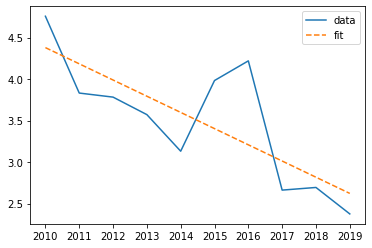

In [78]:
fit_y = linearFunction(x_data, p[0], p[1])
plt.plot(x_data,y_data,label = 'data' )
plt.plot(x_data, fit_y, '--', label = 'fit')
plt.xticks(x_data, y_data.index)
plt.legend()
plt.show()

In [79]:
from sklearn.metrics import r2_score
print("r2_score", r2_score(y_data, fit_y))

r2_score 0.5954935497933329


r2 is an ideal metric for establishing a goodness of fit for data. The metric can take any value between 0 and 1, with the closer to 1 being better.

The following code block tests how well each the function captures the essence of information for the happiness indices in each country. All calculated r2 values are stored in rSquared_df for future analysis.

In [101]:
happines_index = ['Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
                  'Healthy_life_expectancy_at_birth',
                  'Freedom_to_make_life_choices', 'Generosity',
                  'Perceptions_of_corruption', 'Positive_affect',
                  'Negative_affect']

rSqured_df = pd.DataFrame(index = country_df.index, columns = happines_index)

# The ouput is very large, so I didn't run it

# for i,row in country_df.iterrows():
    for h_i in happines_index:
        x_data = range(10)
        y_data = row[h_i]
        p,c= curve_fit(linearFunction,
                 x_data, y_data)
        fit_y = linearFunction(x_data, p[0], p[1])
        
        rS = r2_score(y_data, fit_y)
        rSqured_df.at[i, h_i] = rS
        
        plt.plot(x_data, y_data, label = 'data' )
        plt.plot(x_data, fit_y, '--', label = 'fit')
        plt.xticks(x_data, y_data.index)
        plt.legend()
        plt.title('{} - {} - r2={}'
                  .format(i, h_i, str(round(rS, 2))))
        plt.show()

IndentationError: unexpected indent (Temp/ipykernel_30164/572306190.py, line 12)

The next step is to create a box plot of all r2 values per happiness index.

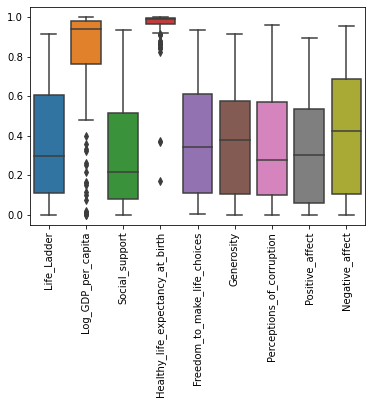

In [81]:
sns.boxplot(data = rSqured_df)
plt.xticks(rotation = 90)
plt.show()

The above box plot uses r2 scores and we can see that the log_GDP_per_capita and Healthy_life_expectancy at birth have the best fits, as these r2 values are closest to one - a perfect r2 score. The following code creates the linearFDA function, which can be used on subsequent data

In [83]:
happines_index = ['Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
                  'Healthy_life_expectancy_at_birth',
                  'Freedom_to_make_life_choices', 'Generosity',
                  'Perceptions_of_corruption', 'Positive_affect',
                  'Negative_affect']

ml_index = pd.MultiIndex.from_product(
    [happines_index,['a', 'b']],
    names=('Hapiness Index', 'Parameter'))

def linearFDA(row):
    
    output_sr = pd.Series(np.nan,index = ml_index)
    
    for h_i in happines_index:
        x_data = range(10)
        y_data = row[h_i]
        p, c = curve_fit(linearFunction,
                 x_data, y_data,maxfev = 1000)
        output_sr.loc[(h_i, 'a')] = p[0]
        output_sr.loc[(h_i, 'b')] = p[1]
        
    return(output_sr)

Next, apply the function to the data

In [84]:
country_df_t = country_df.apply(linearFDA, axis = 1)

C:\Users\Nicholas\anaconda3\envs\Fatalities_Prediction\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [85]:
country_df_t

Hapiness Index Life_Ladder           Log_GDP_per_capita            \
Parameter                a         b                  a         b   
Name                                                                
Afghanistan       4.379782 -0.195285           7.667800  0.004933   
Albania           5.336364 -0.079903           9.290091  0.026558   
Algeria           5.838145 -0.076321           9.298818  0.006985   
Argentina         6.743273 -0.076727          10.105764 -0.008570   
Armenia           4.094182  0.094382           9.147018  0.038285   
...                    ...       ...                ...       ...   
Uruguay           6.356545  0.013612           9.816382  0.021115   
Uzbekistan        5.550927  0.088394           8.460182  0.046115   
Vietnam           5.372291 -0.020909           8.525400  0.050400   
Zambia            5.312527 -0.178939           8.084345  0.010279   
Zimbabwe          5.067927 -0.220806           7.855055  0.021655   

Hapiness Index Social_support           Healthy_life_expectancy_at_birth  \
Parameter                   a         b                                a   
Name                                                                       
Afghanistan          0.539364 -0.006570                        52.072727   
Albania              0.750145 -0.012321                        66.381818   
Algeria              0.820327 -0.003473                        64.465091   
Argentina            0.912618 -0.001515                        67.281818   
Armenia              0.670727  0.011594                        65.072727   
...                       ...       ...                              ...   
Uruguay              0.882527  0.004394                        68.036364   
Uzbekistan           0.934036  0.000570                        63.109091   
Vietnam              0.802727  0.005394                        66.463636   
Zambia               0.841473 -0.019594                        50.573818   
Zimbabwe             0.861455 -0.014212                        47.445455   

Hapiness Index           Freedom_to_make_life_choices           Generosity  \
Parameter              b                            a         b          a   
Name                                                                         
Afghanistan     0.099394                     0.577909 -0.021291   0.204273   
Albania         0.288485                     0.538255  0.031721  -0.176836   
Algeria         0.177091                     0.585873 -0.015461  -0.213582   
Argentina       0.188485                     0.748436  0.011436  -0.133145   
Armenia         0.219394                     0.401164  0.041164  -0.212945   
...                  ...                          ...       ...        ...   
Uruguay         0.123030                     0.856527  0.005794  -0.056818   
Uzbekistan      0.242424                     0.928618  0.006418  -0.051855   
Vietnam         0.176970                     0.838636  0.011314   0.026618   
Zambia          0.597818                     0.701673  0.015006  -0.037782   
Zimbabwe        1.072121                     0.584564  0.015297  -0.102018   

Hapiness Index           Perceptions_of_corruption           Positive_affect  \
Parameter              b                         a         b               a   
Name                                                                           
Afghanistan    -0.034661                  0.725836  0.025103        0.682600   
Albania         0.018964                  0.809873  0.012739        0.626582   
Algeria         0.013152                  0.637400  0.012267        0.580909   
Argentina      -0.008545                  0.814764  0.004097        0.855018   
Armenia         0.005455                  0.958618 -0.025782        0.504400   
...                  ...                       ...       ...             ...   
Uruguay        -0.002352                  0.533418  0.015218        0.800818   
Uzbekistan      0.041079                  0.491964 -0.000236        0.76941

The data set has now been reduced to 18 variables from the 90 in the original data. In each of the 18 variables, the letter a indicates the starting point, while the letter b indicates the slope of change of the happiness index. It is through inclusion of a and b that FDA has also transformed the data

## Prominent functions to use for FDA

There are four such functions, namely exponential, Fourier, and sinusoidal. 

### Exponential Function

This function can be characterised as exponential growth or decay. To elaborate further, what we know as exponential growth can be slow at the start, but which then rapidly increases. The parameters of this function is a and b and e is a constant known as Euler's number, which is a constant that is approximately 2.71. To obtain an accurate value of e, run the following code

In [88]:
np.exp(1)

2.718281828459045

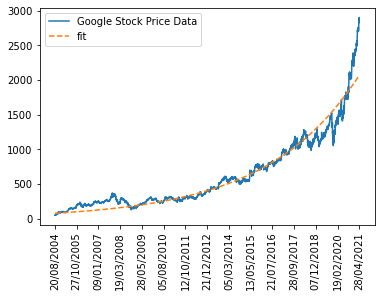

r2_score 0.9448509203130193


In [87]:
def exponantial(x,a,b):
    y = a * np.exp(b * x)
    return y

price_df = pd.read_csv('C:/Python_Data_Sets/GoogleStock.csv')
price_df.set_index('t', inplace = True)

y_data = price_df.Price
x_data = range(len(y_data))

p,c= curve_fit(exponantial,
                 x_data, y_data, p0 = [50, 0])

fit_y = exponantial(x_data,p[0], p[1])
plt.plot(x_data,y_data, label = 'Google Stock Price Data')
plt.plot(x_data, fit_y, '--', label = 'fit')
plt.xticks(np.linspace(1, len(y_data), 15), y_data.iloc[1::300].index,rotation = 90)
plt.legend()
plt.show()

print("r2_score", r2_score(y_data, fit_y))

In the above code, we have given the curve_fit fuction a helping hand by stating that the intercept will be the number 50, which is the google stocks for the first few days.

## Fourier Function

This function can be used to capture vibrational signals such as noise and voice data.

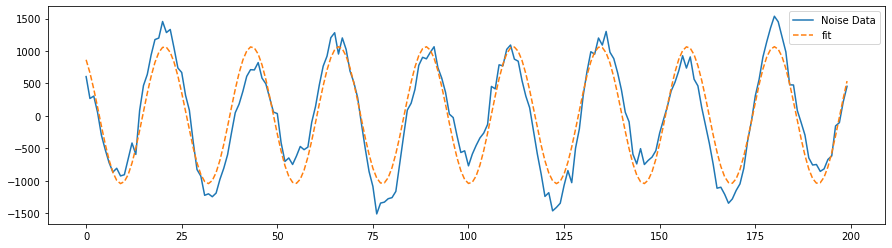

r2_score 0.8770501065480367


In [91]:
def fourier(x, a0, a1, b1, w):
    y = a0 + a1 * np.cos(x * w) + b1 * np.sin(x * w)
    return y

noise_df = pd.read_csv('C:/Python_Data_Sets/Noise_data.csv')
noise_df.set_index('t', inplace = True)

y_data = noise_df.Signal
x_data = range(len(y_data))

p,c= curve_fit(fourier,
                 x_data, y_data, p0 = [10, 1000, -400, 0.3])

fit_y = fourier(x_data, p[0], p[1], p[2], p[3])
plt.figure(figsize = (15, 4))
plt.plot(x_data,y_data,label = 'Noise Data')
plt.plot(x_data, fit_y, '--', label = 'fit')
plt.legend()
plt.show()
print("r2_score", r2_score(y_data, fit_y))

## Sinusoidal Function

This is similar to the Fourier function in that it can also capture oscillations and reciprocations and noise and voice data.

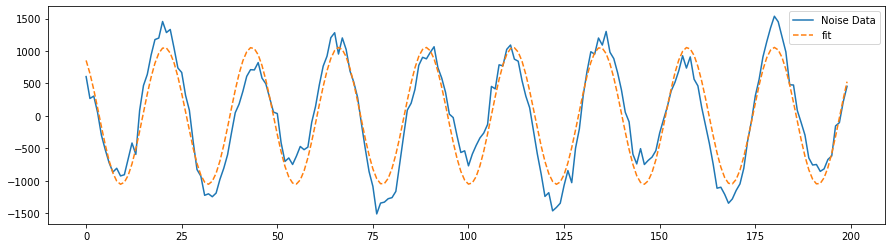

r2_score 0.8768630893287548


In [94]:
def sinusoidal(x, a1, b1, c1):
    y =  a1 * np.sin(b1 * x + c1)
    return y

noise_df = pd.read_csv('C:/Python_Data_Sets/Noise_data.csv')
noise_df.set_index('t', inplace = True)

y_data = noise_df.Signal
x_data = range(len(y_data))

p, c = curve_fit(sinusoidal,
                 x_data, y_data, p0 = [1000, 0.25, 2.5])

fit_y = sinusoidal(x_data, p[0], p[1], p[2])
plt.figure(figsize = (15, 4))
plt.plot(x_data, y_data, label = 'Noise Data')
plt.plot(x_data, fit_y, '--', label = 'fit')
plt.legend()
plt.show()
print("r2_score", r2_score(y_data, fit_y))